# NAT Meter stats

In [1]:
import requests
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'requests'

## Dualstack

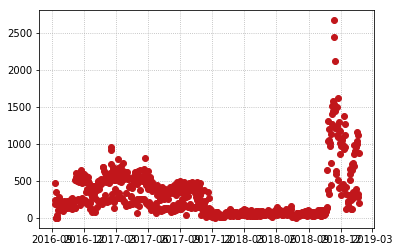

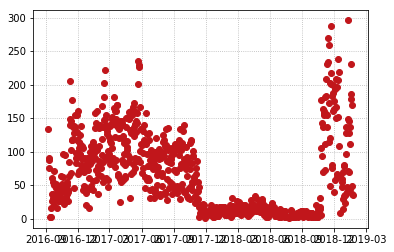

In [22]:
BASE_URL = "https://natmeter.labs.lacnic.net/reports"

def fetch(url):
    _dict = {}
    
    response = requests.get(BASE_URL + url)
    entries = response.text.split("\n")
    for e in entries:
        if "," in e:
            k,v = e.split(",")
            _dict[datetime.strptime(k, '%Y-%m-%d')] = int(v)
    return _dict


# plotting
urls = ["/dualstack_false", "/dualstack_true"]
answers = {}
for url in urls:
    _dict = fetch(url)
    answers[url] = _dict
    
    plt.plot_date(
        _dict.keys(), _dict.values(),
        color=plt.get_cmap('Reds')(200)
    )
    plt.grid(linestyle='dotted')
    plt.show()
    

## Dualstack ratio (true / total)

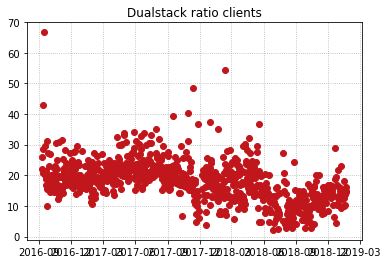

In [14]:
chart = {}

for k,v in answers["/dualstack_true"].items():
    ratio = 100.0*v / (answers["/dualstack_false"][k] + v)
    chart[k] = ratio
    
plt.plot_date(
    chart.keys(), chart.values(),
    color=plt.get_cmap('Reds')(200)
)
plt.grid(linestyle='dotted')
plt.title("Dualstack ratio clients")
plt.show()


## NAT (any)

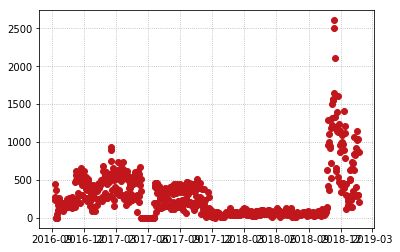

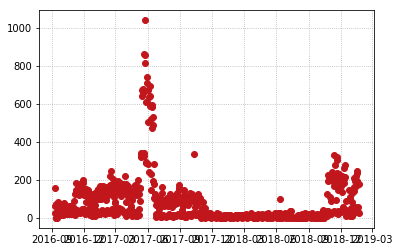

In [15]:
# plotting
urls = ["/nat_free_0_false", "/nat_free_0_true"]
answers = {}
for url in urls:
    _dict = fetch(url)
    answers[url] = _dict
    
    plt.plot_date(
        _dict.keys(), _dict.values(),
        color=plt.get_cmap('Reds')(200)
    )
    plt.grid(linestyle='dotted')
    plt.show()

## NAT (any) ratio

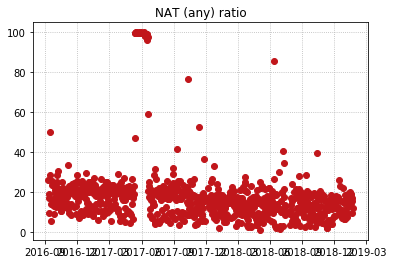

In [16]:
chart = {}

for k,v in answers["/nat_free_0_true"].items():
    try:
        ratio = 100.0*v / (answers["/nat_free_0_false"][k] + v)
    except KeyError:
        continue
        
    chart[k] = ratio
    
plt.plot_date(
    chart.keys(), chart.values(),
    color=plt.get_cmap('Reds')(200)
)
plt.grid(linestyle='dotted')
plt.title("NAT (any) ratio")
plt.show()

## NAT 66

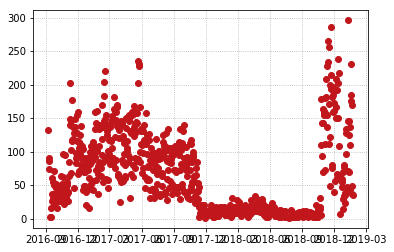

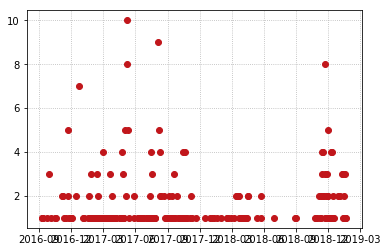

In [17]:
# plotting
urls = ["/nat_free_6_true", "/nat_free_6_false"]
answers = {}
for url in urls:
    _dict = fetch(url)
    answers[url] = _dict
    
    plt.plot_date(
        _dict.keys(), _dict.values(),
        color=plt.get_cmap('Reds')(200)
    )
    plt.grid(linestyle='dotted')
    plt.show()

## NAT 66 ratio

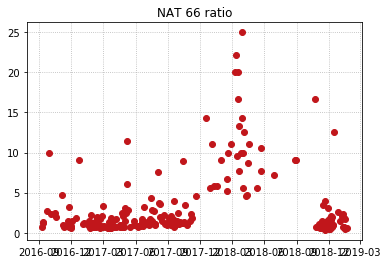

In [18]:
chart = {}

for k,v in answers["/nat_free_6_false"].items():
    try:
        ratio = 100.0*v / (answers["/nat_free_6_true"][k] + v)
    except KeyError:
        continue
        
    chart[k] = ratio
    
plt.plot_date(
    chart.keys(), chart.values(),
    color=plt.get_cmap('Reds')(200)
)
plt.grid(linestyle='dotted')
plt.title("NAT 66 ratio")
plt.show()

## NAT 44

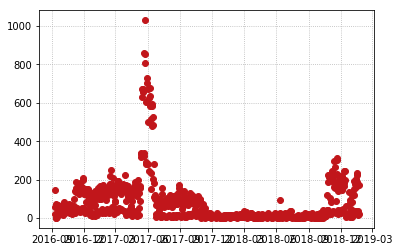

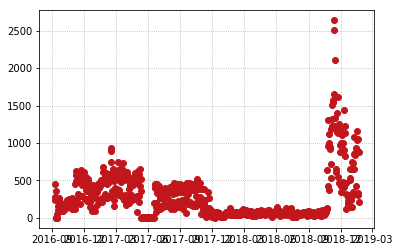

In [20]:
# plotting
urls = ["/nat_free_4_true", "/nat_free_4_false"]
answers = {}
for url in urls:
    _dict = fetch(url)
    answers[url] = _dict
    
    plt.plot_date(
        _dict.keys(), _dict.values(),
        color=plt.get_cmap('Reds')(200)
    )
    plt.grid(linestyle='dotted')
    plt.show()

## NAT 44 ratio

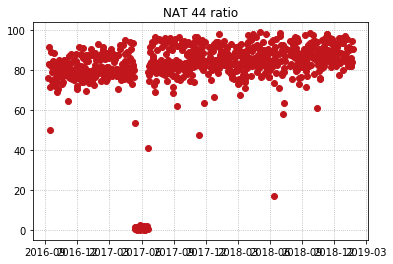

In [21]:
chart = {}

for k,v in answers["/nat_free_4_false"].items():
    try:
        ratio = 100.0*v / (answers["/nat_free_4_true"][k] + v)
    except KeyError:
        continue
        
    chart[k] = ratio
    
plt.plot_date(
    chart.keys(), chart.values(),
    color=plt.get_cmap('Reds')(200)
)
plt.grid(linestyle='dotted')
plt.title("NAT 44 ratio")
plt.show()
